In [8]:
from shapely import geometry, ops
from shapely.geometry import LineString
from scipy.ndimage import filters
import geopandas as gpd
import os
import numpy as np

In [9]:
land_use_path_gpd = gpd.read_file(os.path.join('Study_area','SX7677','land_use_path_gpd.geojson'))

In [10]:
geom = land_use_path_gpd['geometry'].tolist()

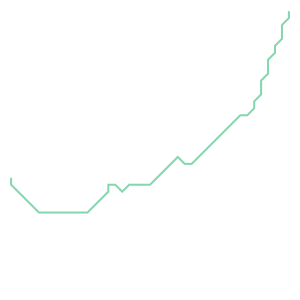

In [11]:
# https://gis.stackexchange.com/questions/223447/welding-individual-line-segments-into-one-linestring-using-shapely
multi_line = geometry.MultiLineString(geom)
multi_line
merge_line = ops.linemerge(multi_line)
merge_line

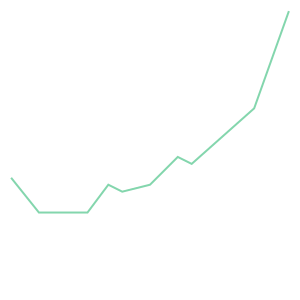

In [12]:
simplify_line = merge_line.simplify(20,preserve_topology=False)
simplify_line

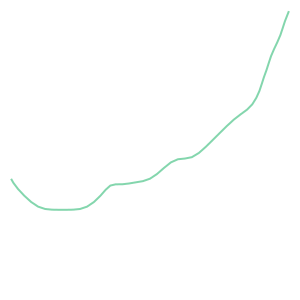

In [14]:
#https://programtalk.com/python-examples/shapely.geometry.LineString/


def smooth_linestring(linestring, smooth_sigma):
    """
    Uses a gauss filter to smooth out the LineString coordinates.
    """
    smooth_x = np.array(filters.gaussian_filter1d(
        linestring.xy[0],
        smooth_sigma)
        )
    smooth_y = np.array(filters.gaussian_filter1d(
        linestring.xy[1],
        smooth_sigma)
        )
    smoothed_coords = np.hstack((smooth_x, smooth_y))
    smoothed_coords = zip(smooth_x, smooth_y)
    linestring_smoothed = LineString(smoothed_coords)
    return linestring_smoothed

linestring_smoother = smooth_linestring(merge_line,1.2)
linestring_smoother